In [5]:
import pandas as pd
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg


## IMAGE MODELING

###  I) Image processing  

    1) Load  and read the images
    2) Greyscale images with opencv
    3) Apply blur
    4) Edge detection of the images
    5) Increae the thinkness of the edges
    6) Resize images
    7) Rotate images
    8) See All the image modification together by stacking the processed images
    9) Function to do all the preprocessing steps for all images
    10) Image Path creator

###  II) Image Feature Extraction
    
    1) Keypoints detection of an image
    2) Compare each descriptors of the first image with the descriptors of the second image
    
    

Features of a digital image such as colour, texture, shapes and the locations of these features on
the image represent characteristics that enable the image to be distinguished from other images
the first step in any supervised or unsupervised image classification is the detection and extraction features present in the image,
    
keypoints: 

corresponding to high-contrast locations such as object edges and corners on the image are
typically regarded as good descriptive image features and these features are described with the help of descriptors. 

Keypoints dectetion techniques:

 - Shift Invariance Feature Transform (SIFT) is an image feature extraction algorithm that ensures the detection of keypoints that are stable and scale invariant, the keypoints are detected via  DoG (Difference of Gaussian) pyramid created using a Gaussian filtered copy of the image.
 - Speeded-Up Robust Features(SURF) uses the Hessian matrix detector.
 
### III) Bag of visual words and images clustering into categories with Kmeans algorithm

    1) Load the images = cerat a colum with the matrices of images
    2) Features extraction
    3) Construct a dictionary of visual words  or Bag of Visual Words 
        - by performing a KMeans clustering on the descriptors 
    4) Creating histograms for the images
    

    
 - The BOV model is a popular image representation for classification purposes, which uses a visual-words histogram to effectively represent an image, BOV representation of images is the visual codebook development; a process that requires the use of K-means clustering to quantize the vectors representing image features into visual-words 
 
 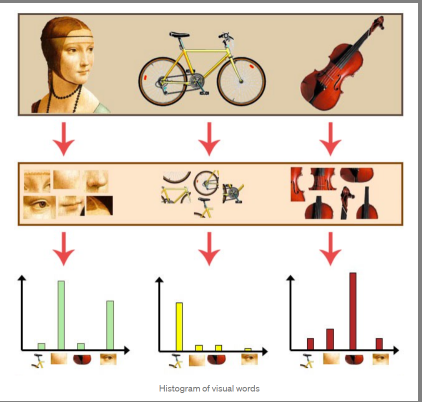
 
 image from : https://towardsdatascience.com/bag-of-visual-words-in-a-nutshell-9ceea97ce0fb
 

In [2]:
data = pd.read_csv('data.csv')
data_images_matrices= pd.read_csv('data_images.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'uniq_id', 'product_name', 'product_category_tree',
       'image', 'description', 'preprocessed_descriptions'],
      dtype='object')

 ## I) Image processing
 
    1) Load  and read the images

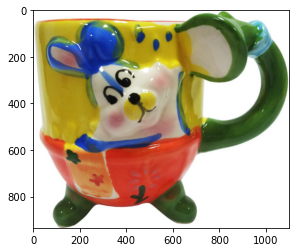

In [18]:
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

im = cv2.imread('Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', 1)
im2 = im[:,:,::-1] 
plt.imshow(im2)
plt.show()


In [5]:
im2.shape

(935, 1100, 3)

 ## I) Image processing
 
    2) Greyscale images with opencv

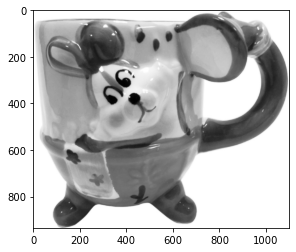

In [13]:
# Display a grey image
im = cv2.imread('Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', 1)
imgGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Add some blur
imgBlur_cup1 = cv2.GaussianBlur(imgGray, (11, 11), 1) 
plt.imshow(imgBlur_cup1, cmap='Greys_r') 




 I) Image processing
 
3) Apply blur

In [7]:
# im_cup2 = cv2.imread('Images/2f712e172ee77a913b6d627657986b72.jpg', 1)
# imgGray_cup2 = cv2.cvtColor(im_cup2, cv2.COLOR_BGR2GRAY)

# imgBlur_cup2 = cv2.GaussianBlur(imgGray_cup2, (11, 11), 1) 
# plt.imshow(imgBlur_cup2, cmap='Greys_r') 

 ## I) Image processing
 
    4) Edge detection of the images

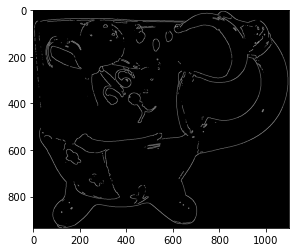

In [15]:
# Edge detection
imgCanny =cv2.Canny(imgBlur_cup1, 100, 100) # the 100 are the threshold values
plt.imshow(imgCanny, cmap='Greys_r')


 ## I) Image processing
 
    5) Increae the thinkness of the edges

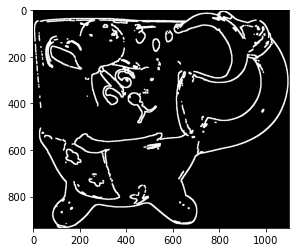

In [19]:
# we can change the thikness of the edges 
# This is done when the edges are discontinued , 
#because there is a gap or they are not joined prperly
# So we might want to increae the thinkness of the edges to beter visualize them 

# We have to creat a kernel which is a matrix that we'll be applying to our image pixels
kernel = np.ones((5,5),np.uint8) # 5,5 is the size of the matrix, unit8 means unsigned integer arrays of 8-bit( values ranging from 0 to 255) 

imgDialation= cv2.dilate(imgCanny, kernel, iterations = 1)

plt.imshow(imgDialation, cmap='Greys_r')

 ## I) Image processing
 
    6) Resize images

In [15]:
img_rotate_90_clockwise = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite('./rotated_foto/' + 'rotated_90' + 'ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', img_rotate_90_clockwise)
# True

# img_rotate_90_counterclockwise = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
# cv2.imwrite('data/dst/lena_cv_rotate_90_counterclockwise.jpg', img_rotate_90_counterclockwise)
# # True

# img_rotate_180 = cv2.rotate(img, cv2.ROTATE_180)
# cv2.imwrite('data/dst/lena_cv_rotate_180.jpg', img_rotate_180)
# True 

True

 ## I) Image processing
 
    7) Rotate images

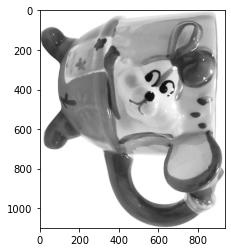

In [16]:
im_rotated = cv2.imread('./rotated_foto/rotated_90ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(im_rotated, cmap= 'Greys_r')


In [17]:
im_rotated.shape

(1100, 935)

   ## I) Image precessing 

    8) See All the image modification together by stacking the processed images 

In [11]:
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

In [21]:
imgStack = stackImages(0.6,([im, imgBlur_cup1],
                           [imgCanny, imgDialation]))

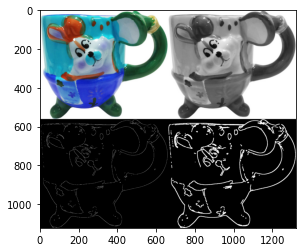

In [22]:
plt.imshow(imgStack, cmap='Greys_r')

## I) Image preprocessing 

    9) Function to do all the preprocessing steps for all images 

In [18]:
# Let's greyscale, resize (100 by 100 pixels) and put all the images in a new directory
def imagePreprocessor(images_dir_path, images_resized_dir_path, image_names):
   
    for image_name in image_names:
        image = cv2.imread(images_dir_path  +"/"+ image_name, cv2.IMREAD_GRAYSCALE)
        imgBlur = cv2.GaussianBlur(image, (11, 11), 1) 
        
            
        # Now let's resize the images
        image_resized = cv2.resize(imgBlur,(100,100), interpolation=cv2.INTER_AREA)
        cv2.imwrite(images_resized_dir_path + 'resized_' + image_name, image_resized )
      
    return ('Images resized successfully!')
       

In [26]:
imagePreprocessor('./Images', "./resized_images/", data['image'])


'Images resized successfully!'

## I) Image preprocessing

    10) Image Path creator
    
    To acces the images we need to have the path of the image.
    Here bellow the function will create the paths to every image based on their location and name.

In [14]:
# for filename in os.listdir('./resized_images/'):
#     print(filename)

In [19]:
def imagePathsCreator(path_to_images_dir, image_names_list):
    images_paths= []
    path_to_images_dir = path_to_images_dir 
    for i in image_names_list:  
        image_path = path_to_images_dir  +i
        images_paths.append(image_path)
    return images_paths

# Let's run the function
resized_images_paths = imagePathsCreator('./resized_images', data['image'])

## II) Image Feature Extraction

    1) Keypoints detection of an image

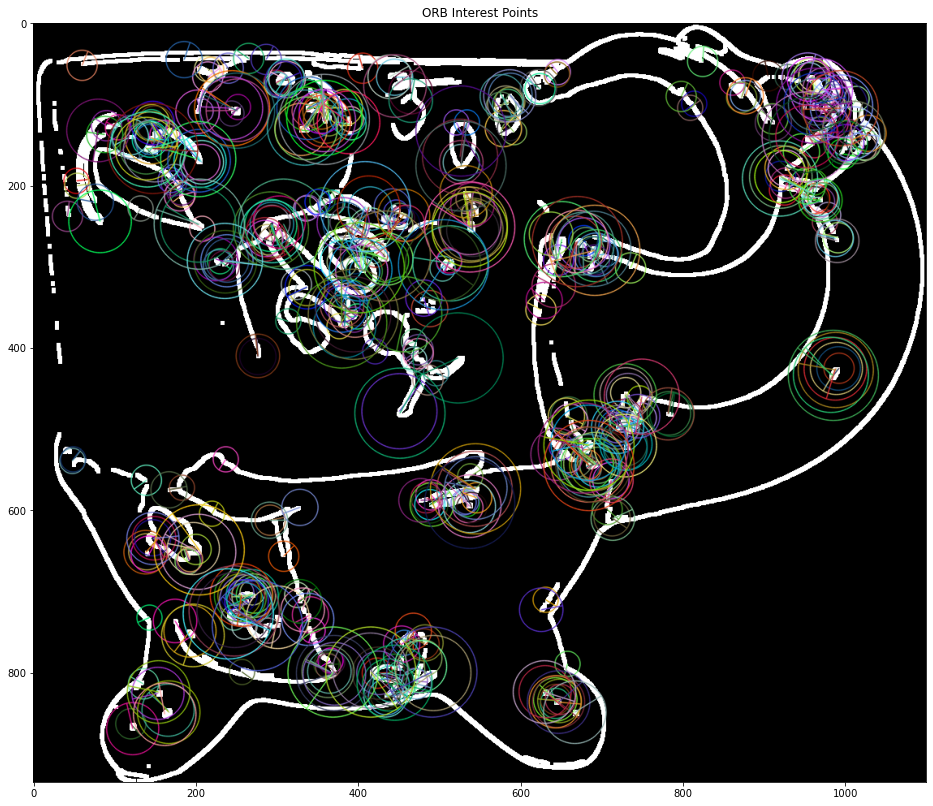

In [20]:
orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(imgDialation, None)
img_building_keypoints = cv2.drawKeypoints(imgDialation, 
                                           key_points, 
                                           imgDialation, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints) 
plt.show()

## II) Image Feature Extraction

  2) Compare each descriptors of the first image with the descriptors of the second image    

476


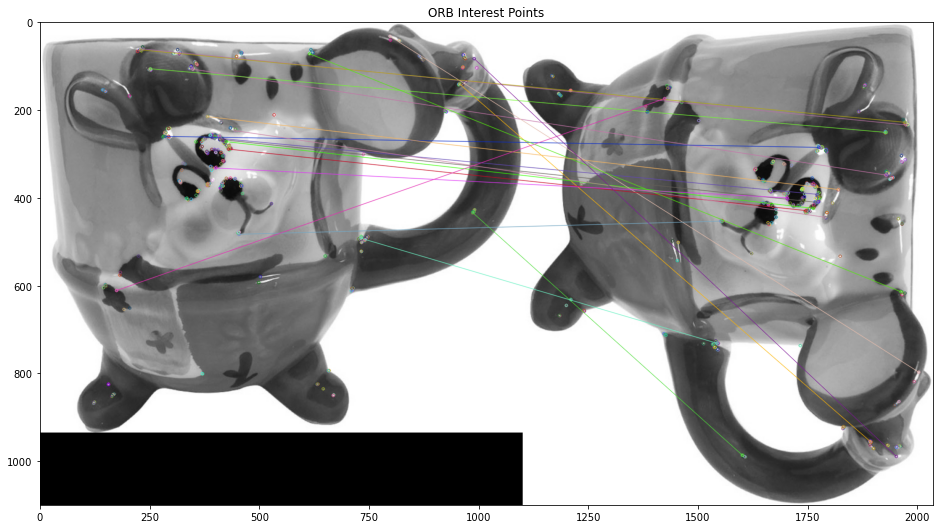

In [11]:

imGrey_normal = cv2.imread('Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', cv2.IMREAD_GRAYSCALE)
imGrey_rotated = cv2.imread('./rotated_foto/rotated_90ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
kp1, desc1 = orb.detectAndCompute(imGrey_normal, None)
kp2, desc2 = orb.detectAndCompute(imGrey_rotated, None)

# Brute force matching
#Compare each descriptors of the first image with the descriptors of the second image
#descriptors are arrays of numbers describing each keypoints

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # crossCheck picks the best features to be compared
matches = bf.match(desc1, desc2)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))

# for matche in matches:
#     print(matche.distance) # the lower the number the better is the match

matching_result = cv2.drawMatches(imGrey_normal, kp1, imGrey_rotated, kp2, matches[0:20], None )# We take 20 best matches

# Show the matching keypoints in two images
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(matching_result) 
plt.show()

## III) Bag of visual words and images clustering into categories with Kmeans algorithm

    1) Load the images = assign a column with the matrices of images
    2)Features extraction
    3) Construct a dictionary of visual words
    

## III) Bag of visual words and images clustering into categories with Kmeans algorithm

    1) Load the images = cerat a colum with the matrices of images

In [20]:
# Get the paths to the resized images
resized_images_paths = imagePathsCreator('./resized_images/resized_', data['image'])

In [21]:
# Paths to the original unprocessed images
original_images_paths = imagePathsCreator('./Images/', data['image'])
original_images_paths[0]

'./Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg'

In [22]:
# add column with the path of every image in the dataframe
data['image_path'] = resized_images_paths

In [23]:
# # Creat a datframe with images names and images paths only 
# df = data.copy()
# df = df[['image_path', 'image']]



In [24]:
# # dictionary of images 
# dic_image_path = df.set_index('image').T.to_dict('list')

In [25]:

# Let's take all matrices representing the image data from our image forder
def image_loader (images_paths):
    
    images_list = []
    
    for image_path in images_paths:
        im = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)
        images_list.append(im)
    return (images_list)

# Run the function        
images = image_loader (resized_images_paths)
print( 'The length of the images list is : ', len(images))

The length of the images list is :  1050


In [26]:
# Creat a colum with the images matrices in our dataframe 'data'
data['image_matrix'] = images

In [27]:
# Now we have a dataframe containing only image names and their corresponding matrix 
data_images_matrices = data.copy()
data_images_matrices = data_images_matrices[['image','image_matrix']]

In [28]:
data_images_matrices.head(1)

,image,image_matrix
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[202, 203, 203, 202, 202, 203, 203, 202, 201,..."


In [84]:
# Save data
data_images_matrices.to_csv("data_images.csv")

In [85]:
data_images_matrices= pd.read_csv('data_images.csv')

In [29]:
# Let's split the images into train and test sets
from sklearn.model_selection import ShuffleSplit, train_test_split

train_ind, test_ind = next(ShuffleSplit(random_state=42,  test_size=0.20,).split(data_images_matrices['image_matrix']))
#data_images_matrices['image_matrix'][train_ind]

In [30]:
X_train = data_images_matrices['image_matrix'][train_ind]
X_test = data_images_matrices['image_matrix'][test_ind]

In [31]:
X_train.shape, X_test.shape

((840,), (210,))

In [32]:
# update the dataframe by keeping only train index rows
updated_train_df = data_images_matrices.drop(test_ind)

In [33]:
updated_train_df.shape

(840, 2)

In [104]:
updated_train_df.head(1)

,image,image_matrix
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[202, 203, 203, 202, 202, 203, 203, 202, 201,..."


In [92]:
# Save data
updated_train_df.to_csv("updated_train_df.csv")

In [93]:
updated_train_df= pd.read_csv('updated_train_df.csv')

In [94]:
# # gives the indices of the training set
# train_ind

In [34]:
updated_train_df['image_matrix']

0       [[202, 203, 203, 202, 202, 203, 203, 202, 201,...
1       [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
4       [[128, 163, 148, 125, 105, 130, 145, 187, 184,...
5       [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
6       [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
                              ...                        
1043    [[149, 151, 155, 157, 158, 158, 158, 157, 157,...
1044    [[236, 236, 236, 236, 237, 237, 237, 236, 237,...
1045    [[246, 230, 232, 244, 250, 248, 251, 252, 253,...
1047    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1049    [[227, 227, 227, 227, 227, 227, 227, 227, 227,...
Name: image_matrix, Length: 840, dtype: object

In [106]:
type(updated_train_df['image_matrix'])

pandas.core.series.Series

## III) Bag of visual words and images clustering into categories with Kmeans algorithm
    2) Features extraction

In [35]:
# Creat a function to extract features from all train images and output them without order
def orbFeatureExtractor (image_matrix):
    orb = cv2.ORB_create()
   
    descriptor_list = []
    for image_array in image_matrix:
        kp, desc = orb.detectAndCompute(image_array, None)
        if desc is not None:
            descriptor_list.append(desc)
       
    return descriptor_list

# run the function with train data 
orb_features_train = orbFeatureExtractor (updated_train_df['image_matrix'].to_numpy())
print('the length of our list is :', len(orb_features_train))

the length of our list is : 800


In [36]:
# In order to creat BOVW we need unordered descriptors of all training images

stacked_orb_descriptors = np.vstack((orb_features_train))
descriptors_float=stacked_orb_descriptors.astype(float)

In [37]:
descriptors_float.shape

(37369, 32)

In [38]:
import pickle

# save the output arrays
with open('orb_features.pickle', 'wb') as f:
    pickle.dump([orb_features_train], f)

In [39]:
# Load the saved output arrays
with open('orb_features.pickle', 'rb') as f:
    output_orb_descriptors = pickle.load(f)

In [40]:
# This returns a tuple of the images path and the corresponding descriptors
des_list=[]

orb = cv2.ORB_create(250)
for image_pat in resized_images_paths:
    im=cv2.imread(image_pat, cv2.IMREAD_GRAYSCALE)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))
    

In [41]:
# extracts descriptors from images index by index as in the original X_train dataframe dataframe 
decriptor_train_list=[]

orb = cv2.ORB_create(250)
for i in updated_train_df['image_matrix']:
    
    kp=orb.detect(i,None)
    keypoints,descriptor= orb.compute(i, kp)
    decriptor_train_list.append((descriptor))

In [42]:
len(decriptor_train_list)

840

In [43]:
updated_train_df['decriptor_train_list'] = decriptor_train_list

In [44]:
updated_train_df.head(1)

,image,image_matrix,decriptor_train_list
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[202, 203, 203, 202, 202, 203, 203, 202, 201,...","[[242, 96, 86, 236, 15, 153, 240, 75, 239, 129..."


In [45]:
updated_train_df.shape

(840, 3)

In [46]:
updated_train_df_dropna = updated_train_df.dropna(how = 'any', axis=0) 
updated_train_df_dropna.shape

(800, 3)

In [94]:
# Save data
updated_train_df_dropna.to_csv("updated_train_df_dropna.csv")

In [107]:
updated_train_df_dropna.head(1)

,image,image_matrix,decriptor_train_list,indices_of_visual_words,Histograms
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[202, 203, 203, 202, 202, 203, 203, 202, 201,...","[[242, 96, 86, 236, 15, 153, 240, 75, 239, 129...","[238, 112, 222, 186, 222, 222, 308, 112, 304, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
updated_train_df_no_NaN = pd.read_csv('updated_train_df_dropna.csv')

In [69]:
updated_train_df_no_NaN.head()

,Unnamed: 0,image,image_matrix,decriptor_train_list
0,0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,[[202 203 203 ... 171 171 170]\n [209 210 210 ...,[[242 96 86 ... 8 113 134]\n [ 84 171 134 ...
1,1,7b72c92c2f6c40268628ec5f14c6d590.jpg,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,[[189 68 107 76 86 86 239 112 84 198 247 ...
2,4,6325b6870c54cd47be6ebfbffa620ec7.jpg,[[128 163 148 ... 213 211 220]\n [141 146 147 ...,[[237 25 86 ... 161 106 20]\n [ 1 169 140 ...
3,5,893aa5ed55f7cff2eccea7758d7a86bd.jpg,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,[[ 90 104 142 ... 116 191 74]\n [ 40 93 249 ...
4,6,f355cc1ccb08bd0d283ed979b7ee7515.jpg,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,[[239 114 124 ... 159 94 119]\n [ 95 123 114 ...


In [483]:
# def imagePathsCreator(path_to_images_dir, image_names_list):
#     images_paths= []
#     path_to_images_dir = path_to_images_dir 
#     for i in image_names_list:  
#         image_path = path_to_images_dir  +'/'+ i
#         images_paths.append(image_path)
#     return images_paths

# # Let's run the function
# resized_images_paths = imagePathsCreator('./resized_images', data['image'])

## III) Bag of visual words and images clustering into categories with Kmeans algorithm
    3) Construct a dictionary of visual words  or Bag of Visual Words 
        - by performing a KMeans clustering on the descriptors 

First way of doing

In [41]:
# from scipy.cluster.vq import kmeans,vq

# k=500
# voc,variance=kmeans(descriptors_float,k,1)
# voc.shape

In [43]:
voc.shape

(500, 32)

In [44]:
variance

298.02634619325914

Second way of doing 

In [47]:
from sklearn.cluster import KMeans

"""A k-means clustering algorithm which takes 2 parameter that are the number 
 of cluster(k) and the other is descriptors list(unordered 1d array)
 Returns an array that holds central points."""

def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words
    
# Takes the central points which are the visual words    
visual_words = kmeans(500, descriptors_float) 

In [48]:
visual_words.shape

(500, 32)

In [50]:
# Fit the clustering model for training images
kmeans = KMeans(n_clusters = 500, n_init=10)
kmeans.fit(descriptors_float)
visual_words = kmeans.cluster_centers_ 

In [51]:
visual_words.shape

(500, 32)

In [52]:
# These are the center points (mean values) for 500 clusters that we've previously created
visual_words

array([[124.50632911, 169.59493671, 166.63291139, ..., 198.3164557 ,
        135.63291139, 165.39240506],
       [ 69.875     ,  76.91071429, 134.25      , ..., 193.91964286,
        102.41071429, 170.78571429],
       [ 88.70422535, 137.53521127, 225.76056338, ..., 207.05633803,
         79.97183099, 149.33802817],
       ...,
       [116.02666667, 218.57333333,  88.68      , ...,  56.02666667,
        100.28      , 186.18666667],
       [136.07692308, 166.79120879,  50.75824176, ...,  49.83516484,
        168.30769231, 113.58241758],
       [135.28915663, 185.59036145, 189.92771084, ..., 101.31325301,
        186.30120482, 120.54216867]])

In [53]:
hist_of_image_1 = kmeans.predict(updated_train_df['decriptor_train_list'][1])

In [54]:
hist_of_image_1.shape

(20,)

## III) Bag of visual words and images clustering into categories with Kmeans algorithm

    4) Creating histograms for the images
    
    To see which Visual word from our BOVW best describs every image, 
    we make a KMeans prediction of our fitted Kmeans model on training images.
    The output is an array of indices of corresponding Visual word from the BOVW of size 500
    

In [55]:
# This is the histograms constructing step for all training images
hist_of_image_1 

array([323, 189, 305, 336, 323, 323, 323,  53, 323, 323, 323, 131, 323,
       323, 323, 323, 305, 397, 323, 323])

In [56]:
hist1 = np.bincount(hist_of_image_1, minlength=500)

In [154]:
hist1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [57]:
# Let's describ all traning images by predicting their feature indices 
indices_of_visual_words_predicted = []
for index, row in updated_train_df_dropna.iterrows():
    hist_of_visual_words =list(kmeans.predict(updated_train_df_dropna.loc[index, 'decriptor_train_list']))
    indices_of_visual_words_predicted.append(hist_of_visual_words)
        

In [58]:
# creat a column with the index values of the visual words present in the every train image
updated_train_df_dropna['indices_of_visual_words'] = indices_of_visual_words_predicted

<ipython-input-58-a38358bfe544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_train_df_dropna['indices_of_visual_words'] = indices_of_visual_words_predicted


In [60]:
updated_train_df_dropna.head(1)

,image,image_matrix,decriptor_train_list,indices_of_visual_words
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[202, 203, 203, 202, 202, 203, 203, 202, 201,...","[[242, 96, 86, 236, 15, 153, 240, 75, 239, 129...","[238, 112, 222, 186, 222, 222, 308, 112, 304, ..."


In [66]:
#creat histograms for every image by using the predicted feature indices

Histograms = []
for indices_of_visual_words in updated_train_df_dropna['indices_of_visual_words']:
    histogram = np.bincount(indices_of_visual_words, minlength=500) # becouse we have 500 words in our BOVW
    Histograms.append(histogram)
    

In [67]:
updated_train_df_dropna['Histograms'] = Histograms

<ipython-input-67-a23c22359fb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_train_df_dropna['Histograms'] = Histograms


##### Creating histogram of training image

In [68]:
updated_train_df_dropna.head(1)

,image,image_matrix,decriptor_train_list,indices_of_visual_words,Histograms
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[202, 203, 203, 202, 202, 203, 203, 202, 201,...","[[242, 96, 86, 236, 15, 153, 240, 75, 239, 129...","[238, 112, 222, 186, 222, 222, 308, 112, 304, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [69]:
descriptors_float.shape

(37369, 32)

In [111]:
# # In order to reveal the most important features for every image we can perform TF-IDF weighting

# # weighing tf-idf function
# def reweight_tf_idf(histograms):
#     re_hists  = np.zeros(histograms.shape)
#     N = histograms.shape[0]
#     n_i = np.sum(histograms > 0, axis=0)
#     for hist_id in range(histograms.shape[0]):
#         n_d  = np.sum(histograms[hist_id])
#         for bin_id in range(len(histograms[hist_id])): 
#             re_hists[hist_id, bin_id] = histograms[hist_id, bin_id]/ n_d * np.log(N/n_i[bin_id])
# #             print(re_hists[hist_id, bin_id], histograms[hist_id, bin_id], n_d, N, n_i[bin_id])
#     return re_hists

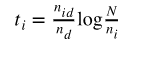

Where: 

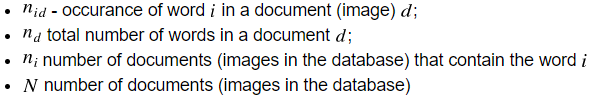

In [78]:
#updated_train_df_dropna['Histograms'].to_numpy()

In [112]:
# reweight_tf_idf(updated_train_df_dropna['Histograms'])

In [108]:
nid_over_nd = [] # These are the results of nid/nd
for cluster in updated_train_df_dropna['indices_of_visual_words']:
    
    nums=pd.Series(cluster).value_counts()
    tf=nums.apply(lambda a:a/nums.sum())
    nid_over_nd.append(tf.to_dict())
    
# Calcultate the number of documents that contain a given feature 

documentsPerFeature=[0] * 500 # Number of clusters
for i in nid_over_nd:
    for k in i:
        documentsPerFeature[k-1] = documentsPerFeature[k-1]+1
        
    
    
# documentsPerFeature[0] = 68 means that the feature at position 0 is repeated 68 times in the total descriptors of all images

In [109]:
# Doing the second part of tf_idf which is IDF log of N/ni
import math as m
tf_idf= pd.DataFrame(columns= range(1,501))
for i in nid_over_nd:
    row=[0]*500
    totalWords=0
    for k in i:
        idf=m.log(len(nid_over_nd)/documentsPerFeature[k-1])
        res=i[k]*idf
        row[k]=res
    tf_idf=tf_idf.append(pd.Series(row, range(1,501)),ignore_index=True )  

    


In [121]:
# Here we have a weighed histogram dataframe for every training image 
len(tf_idf)
tf_idf.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.04887,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.097014,0.0,0.0,0.0,0.0,0.0,0.042502
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.062101,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.062101,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [1]:
np.unique(tf_idf[1])

NameError: name 'np' is not defined

In [114]:
# Creat a confusion matrix to see the results
import matplotlib.pyplot as plt


def compute_cost_matrices(histograms):
    
    cost_matrix_eucl  = np.zeros((800,800))
    cost_matrix_cos  = np.zeros((800,800))

    for row, hist_row in enumerate(histograms):
        for col, hist_col in enumerate(histograms):
            eucl_dist = np.linalg.norm(hist_row-hist_col)
            cost_matrix_eucl[row, col] = eucl_dist
            cos_sim = np.dot(hist_row, hist_col) / (np.linalg.norm(hist_row)* np.linalg.norm(hist_col))
            cost_matrix_cos[row, col] = cos_sim
    return cost_matrix_eucl, cost_matrix_cos

def plotCostMatrix(ax, cost_matrix, title):
    axh = ax.imshow(cost_matrix, cmap='viridis') 
    plt.colorbar(axh, ax = ax)
    ax.set_title(title)

In [115]:
original_histograms = updated_train_df_dropna['Histograms']

In [116]:
weihted_histograms = np.array(tf_idf)

[[0.         1.81198471 0.85137921 ... 0.98188562 0.87618839 0.88155477]
 [1.81198471 0.         1.66045259 ... 1.70427001 1.6452518  1.6475161 ]
 [0.85137921 1.66045259 0.         ... 0.60952397 0.47577354 0.48126525]
 ...
 [0.98188562 1.70427001 0.60952397 ... 0.         0.61609144 0.6099565 ]
 [0.87618839 1.6452518  0.47577354 ... 0.61609144 0.         0.45581098]
 [0.88155477 1.6475161  0.48126525 ... 0.6099565  0.45581098 0.        ]]


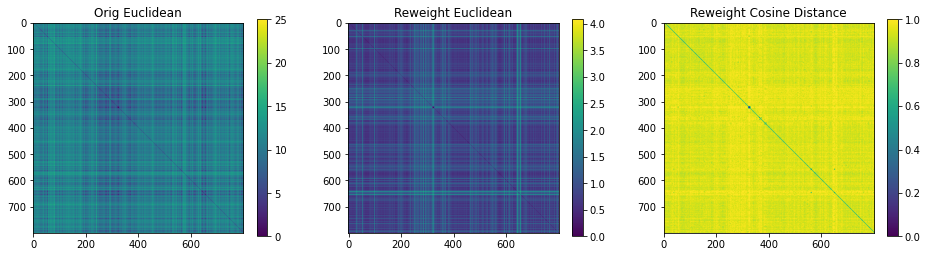

In [118]:
cm_eucl, cm_cos = compute_cost_matrices(original_histograms)
cm_eucl_w, cm_cos_w = compute_cost_matrices(weihted_histograms)

print(cm_eucl_w)


fig, ax = plt.subplots(1,3, figsize=(16,4));

plotCostMatrix(ax[0], cm_eucl, "Orig Euclidean")
plotCostMatrix(ax[1], cm_eucl_w, "Reweight Euclidean")
plotCostMatrix(ax[2], 1- cm_cos_w, "Reweight Cosine Distance")

 ### IV) Convolutional Neural Networks Model VGG16 (CNN)
CNN is a type of Artificila Neural Network used in image recognition that is specifivcally designed to process pixel Data

In [298]:
import keras

In [299]:
keras.backend.backend()

'tensorflow'

In [309]:
pip install keras-resnet


  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=d79bb97bc74aa20674d8fbf22fdafafd45b15322a6449ced2a6b6445937bd0f5
  Stored in directory: c:\users\fata\appdata\local\pip\cache\wheels\be\90\98\9d455f04a7ca277366b36c660c89d171ff5abb7bdd8a8b8e75
Successfully built keras-resnet
Note: you may need to restart the kernel to use updated packages.


In [307]:
 pip install Keras-Applications

Note: you may need to restart the kernel to use updated packages.


In [337]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (49.51%)


As we see the coffee mug as been predicted with 49.51 of probability

In [338]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     